Length of L1 = 
4


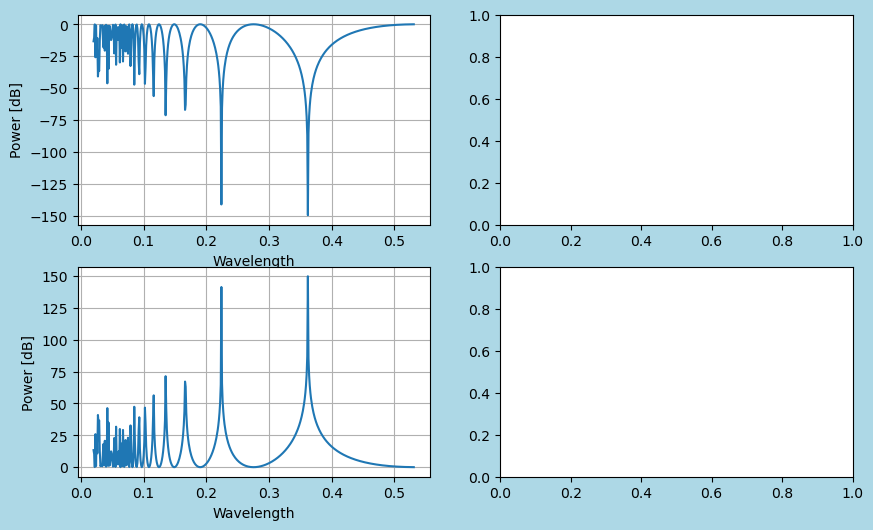

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def transfermatrix(wl, n_name, th1):

    nL = 1.463 + 0.003827/(wl**2) + 0.000/(wl**4)
    nH = 2.1305 + 0.018499/(wl**2) + 0.00199850/(wl**4)
    #nQuartz = 1.6553 + 0.0086444/(wl.^2) + 0.00081178./(wl.^4)
    #nLN = sqrt(2.23413 + ((2.68312-wl.^2)/(wl.^2-0.04481)) + ((2.59121.* wl)/(wl - 109.776)));
 
    #substrate: quartz
  
    match n_name:
        
        case 0:
            n_index = 1
        case 1:
            n_index = nL
        case 2:
            n_index = nH

        

    sigma = 2 * np.pi * n_index * th1/wl #phase [rad]
   	
   	
    TM_intermedate = np.array([[np.cos(sigma),np.exp(1j)*np.sin(sigma)/n_index],[np.exp(1j)*np.sin(sigma)/n_index,np.cos(sigma)]])

    #TM_intermedate = np.array([[1, 0],[0,1]])

    return TM_intermedate


# thin_AR_func.m
# L -> 0;	H ->	1;
#function [wlcol,dBTcol,dBRcol] = ...
#   thin_AR_func(startwl,stepwl,centerwl,mm,layer,thkpara); 
#global c;

startwl = 0.02 # [um]
stepwl = 0.001 # [um]

mm = 512 # number of sampling point

layer1 = np.array([0, 1, 2, 1])

thkpara = np.array([0.181924, 0.181924, 0.181924, 0.181924])

len_layer1 = len(layer1)
print('Length of L1 = ')
print(len_layer1)

wlcol= np.zeros(mm)
P1col=np.zeros(mm)
P2col=np.zeros(mm)
P1dBcol=np.zeros(mm)
P2dBcol=np.zeros(mm)
 

for ii in range(mm):   

    wl = startwl + stepwl *ii
    wlcol[ii] = wl

    TMin = np.array([[1,0],[0,1]])
    
    n0 = 1
    ns = 1.463 + 0.003827/(wl**2) + 0.000/(wl**4)


    for kk in range(len_layer1):

        n_name = layer1[kk]
        thickness1 = thkpara[kk]

        TM_intermediate = transfermatrix(wl, n_name, thickness1)

        TMin = TM_intermediate
        #inner loop ended

    TMout = TM_intermediate

    #print(TMout)
    #print("")

    detTMout = np.linalg.det(TMout)
    #print("det = ", detTMout)

    m11 = TMout[0,0]
    m12 = TMout[0,1]
    m21 = TMout[1,0]
    m22 = TMout[1,1]
     
    s12 = 1/m22

    P1 = np.abs(s12)**2
    P2 = P1
    
    P1col[ii] = P1
    P2col[ii] = P2

    P1dBcol[ii] = -10*np.log(P1)
    P2dBcol[ii] = 10*np.log(P2)
    
    #P1_Phase = np.angle(Eout3_x)
    #P1_phasecol[ii] = P1_Phase

    #outer loop ended


fig = plt.figure(figsize = (10,6), facecolor='lightblue')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


ax1.plot(wlcol,P1dBcol)
ax1.set_xlabel("Wavelength")
ax1.set_ylabel("Power [dB]")
ax1.grid()
#ax1.set_ylim(0,1)



ax3.plot(wlcol,P2dBcol)
ax3.grid()
ax3.set_xlabel("Wavelength")
ax3.set_ylabel("Power [dB]")
#ax2.set_ylim(0,1)

plt.show()

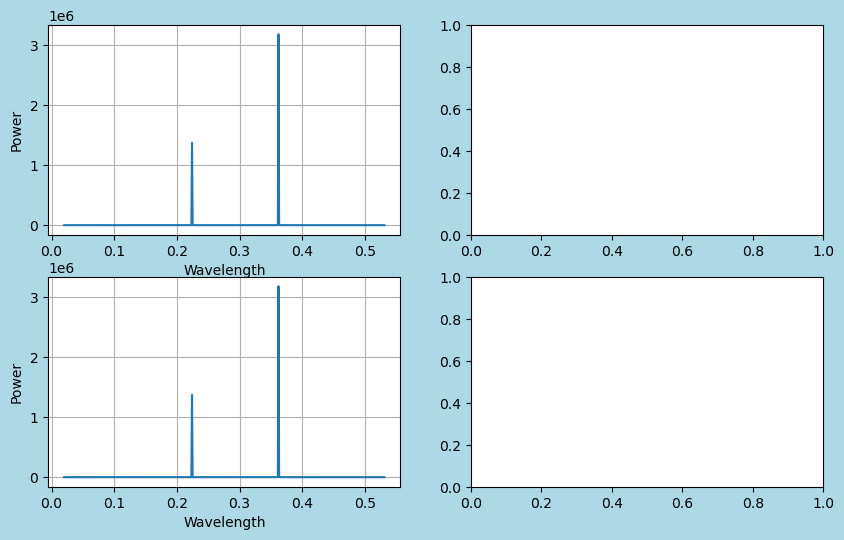

In [4]:
fig = plt.figure(figsize = (10,6), facecolor='lightblue')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


ax1.plot(wlcol,P1col)
ax1.set_xlabel("Wavelength")
ax1.set_ylabel("Power")
ax1.grid()
#ax1.set_ylim(0,1)



ax3.plot(wlcol,P2col)
ax3.grid()
ax3.set_xlabel("Wavelength")
ax3.set_ylabel("Power")
#ax2.set_ylim(0,1)

plt.show()